Задача: Используя искусcтвенно сгенерированный набор данных необходимо
построить классификатор на базе многослойного персептрона.

# Данные

In [ ]:
from sklearn.datasets import make_classification, make_blobs
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8,
cluster_std = 1.3, random_state = 4)

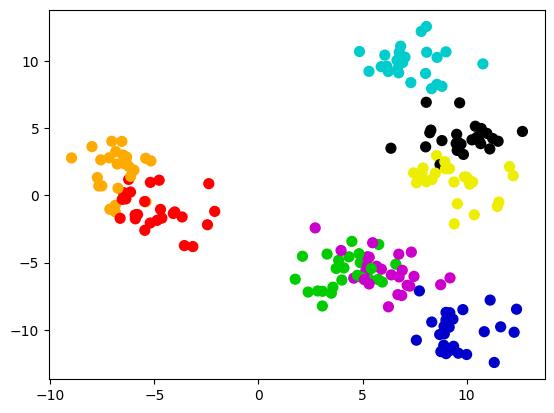

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
color_list_bold = [
    '#EEEE00',  # Bright Yellow
    '#000000',  # Black
    '#00CC00',  # Bright Green
    '#0000CC',  # Bright Blue
    '#FF0000',  # Bright Red
    '#CC00CC',  # Bright Magenta
    '#00CCCC',  # Bright Cyan
    '#FFAA00'   # Bright Orange
]
cmap_bold = ListedColormap(color_list_bold
    # ["#FFFF00","#00FF00", "#0000FF", "#000000"]
                           )

plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker="o", s=50,
cmap=cmap_bold)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)
clf = MLPClassifier(max_iter=10000, hidden_layer_sizes = [10, 10], alpha = 5,
random_state = 0, solver="lbfgs").fit(X_train, y_train)
print("Blob dataset")
print("Accuracy of NN classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of NN classifier on test set: {:.2f}".format(clf.score(X_test, y_test)))

Blob dataset
Accuracy of NN classifier on training set: 0.91
Accuracy of NN classifier on test set: 0.84


## Задача 1*

Для полноценной оценки классификатора необходимо кроме accuracy
определить параметры точности, полноты и гармонической меры (precision, recall, f1-
score), а для наглядного представления результатов классификации используется
матрица ошибок классификации (confusion matrix), которая показывает насколько
классификатор путает объекты разных классов. Анализ матрицы в частности позволяет
выявить объекты, которые сложнее выделить и которые классификатор чаще путает с
другими.
Для расчета указанных параметров используются классы confusion_matrix и
classification_report, которые можно подключить командой
from sklearn.metrics import confusion_matrix, classification_report

**Оцените результаты работы классификатора с помощью перечисленных
параметров и confusion matrix.**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification report of NN classifier on the training set:")
print(classification_report(y_train, clf.predict(X_train)))
print("Classification report of NN classifier on the test set:")
print(classification_report(y_test, clf.predict(X_test)))
print("Confusion matrix on train set")
print(confusion_matrix(y_train, clf.predict(X_train)))
print("Confusion matrix on test set")
print(confusion_matrix(y_test, clf.predict(X_test)))

Classification report of NN classifier on the training set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       0.76      0.84      0.80        19
           3       1.00      0.95      0.98        22
           4       0.88      0.96      0.92        24
           5       0.73      0.69      0.71        16
           6       1.00      1.00      1.00        17
           7       0.94      0.84      0.89        19

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150

Classification report of NN classifier on the test set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7
           2       0.50      0.83      0.62         6
           3    

# Задача 2

Для оценки качества работы классификатора важным является визуализация
классов и разделяющих их границ. Такая визуализация позволяет наглядней
представить как объекты перемешаны в пространстве признаков и как классификатор
справляется со своей задачей.
Для данных и классификатора, описанного выше, постройте наглядное
представление объектов в пространстве признаков.

In [ ]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as colors

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = int(np.amax(y)) + 1
    # color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    # color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    color_list_light = [
    '#FFFFAA',  # Light Yellow
    '#EFEFEF',  # Light Gray
    '#AAFFAA',  # Light Green
    '#AAAAFF',  # Light Blue
    '#FFAAAA',  # Light Red
    '#FFAAFF',  # Light Magenta
    '#AAFFFF',  # Light Cyan
    '#FDAA48'   # Light orange
    ]
    color_list_bold = [
        '#EEEE00',  # Bright Yellow
        '#000000',  # Black
        '#00CC00',  # Bright Green
        '#0000CC',  # Bright Blue
        '#FF0000',  # Bright Red
        '#CC00CC',  # Bright Magenta
        '#00CCCC',  # Bright Cyan
        '#FFAA00'   # Bright Orange
    ]
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min - k, x_max + k, h), np.arange(y_min - k, y_max + k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        u = np.unique(P)
        bounds = np.concatenate(([P.min()-1], u[:-1]+np.diff(u)/2. ,[P.max()+1]))
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8, levels=bounds)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = int(np.amax(y)) + 1
    # color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    # color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    color_list_light = [
    '#FFFFAA',  # Light Yellow
    '#EFEFEF',  # Light Gray
    '#AAFFAA',  # Light Green
    '#AAAAFF',  # Light Blue
    '#FFAAAA',  # Light Red
    '#FFAAFF',  # Light Magenta
    '#AAFFFF',  # Light Cyan
    '#FDAA48'   # Light orange
    ]
    color_list_bold = [
        '#EEEE00',  # Bright Yellow
        '#000000',  # Black
        '#00CC00',  # Bright Green
        '#0000CC',  # Bright Blue
        '#FF0000',  # Bright Red
        '#CC00CC',  # Bright Magenta
        '#00CCCC',  # Bright Cyan
        '#FFAA00'   # Bright Orange
    ]
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        u = np.unique(P)
        bounds = np.concatenate(([P.min()-1], u[:-1]+np.diff(u)/2. ,[P.max()+1]))
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8, levels = bounds)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

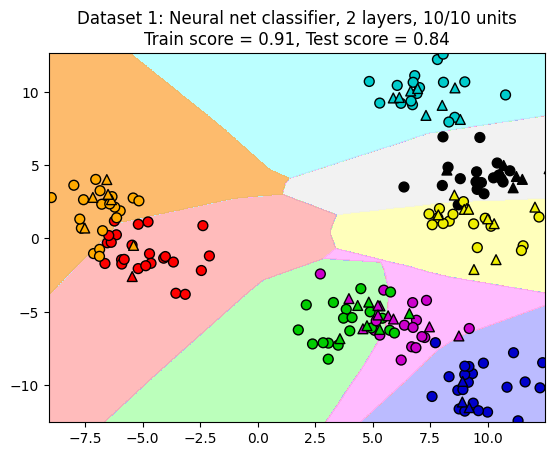

In [ ]:
plot_class_regions_for_classifier(clf, X_train, y_train, X_test,
y_test, "Dataset 1: Neural net classifier, 2 layers, 10/10 units")

# Задача 3
Увеличьте число объектов до 500. Используя предыдущее решение (Задача 1),
изменяя параметр альфа и количество нейронов, обеспечьте улучшение показателей
классификации вашей программы.

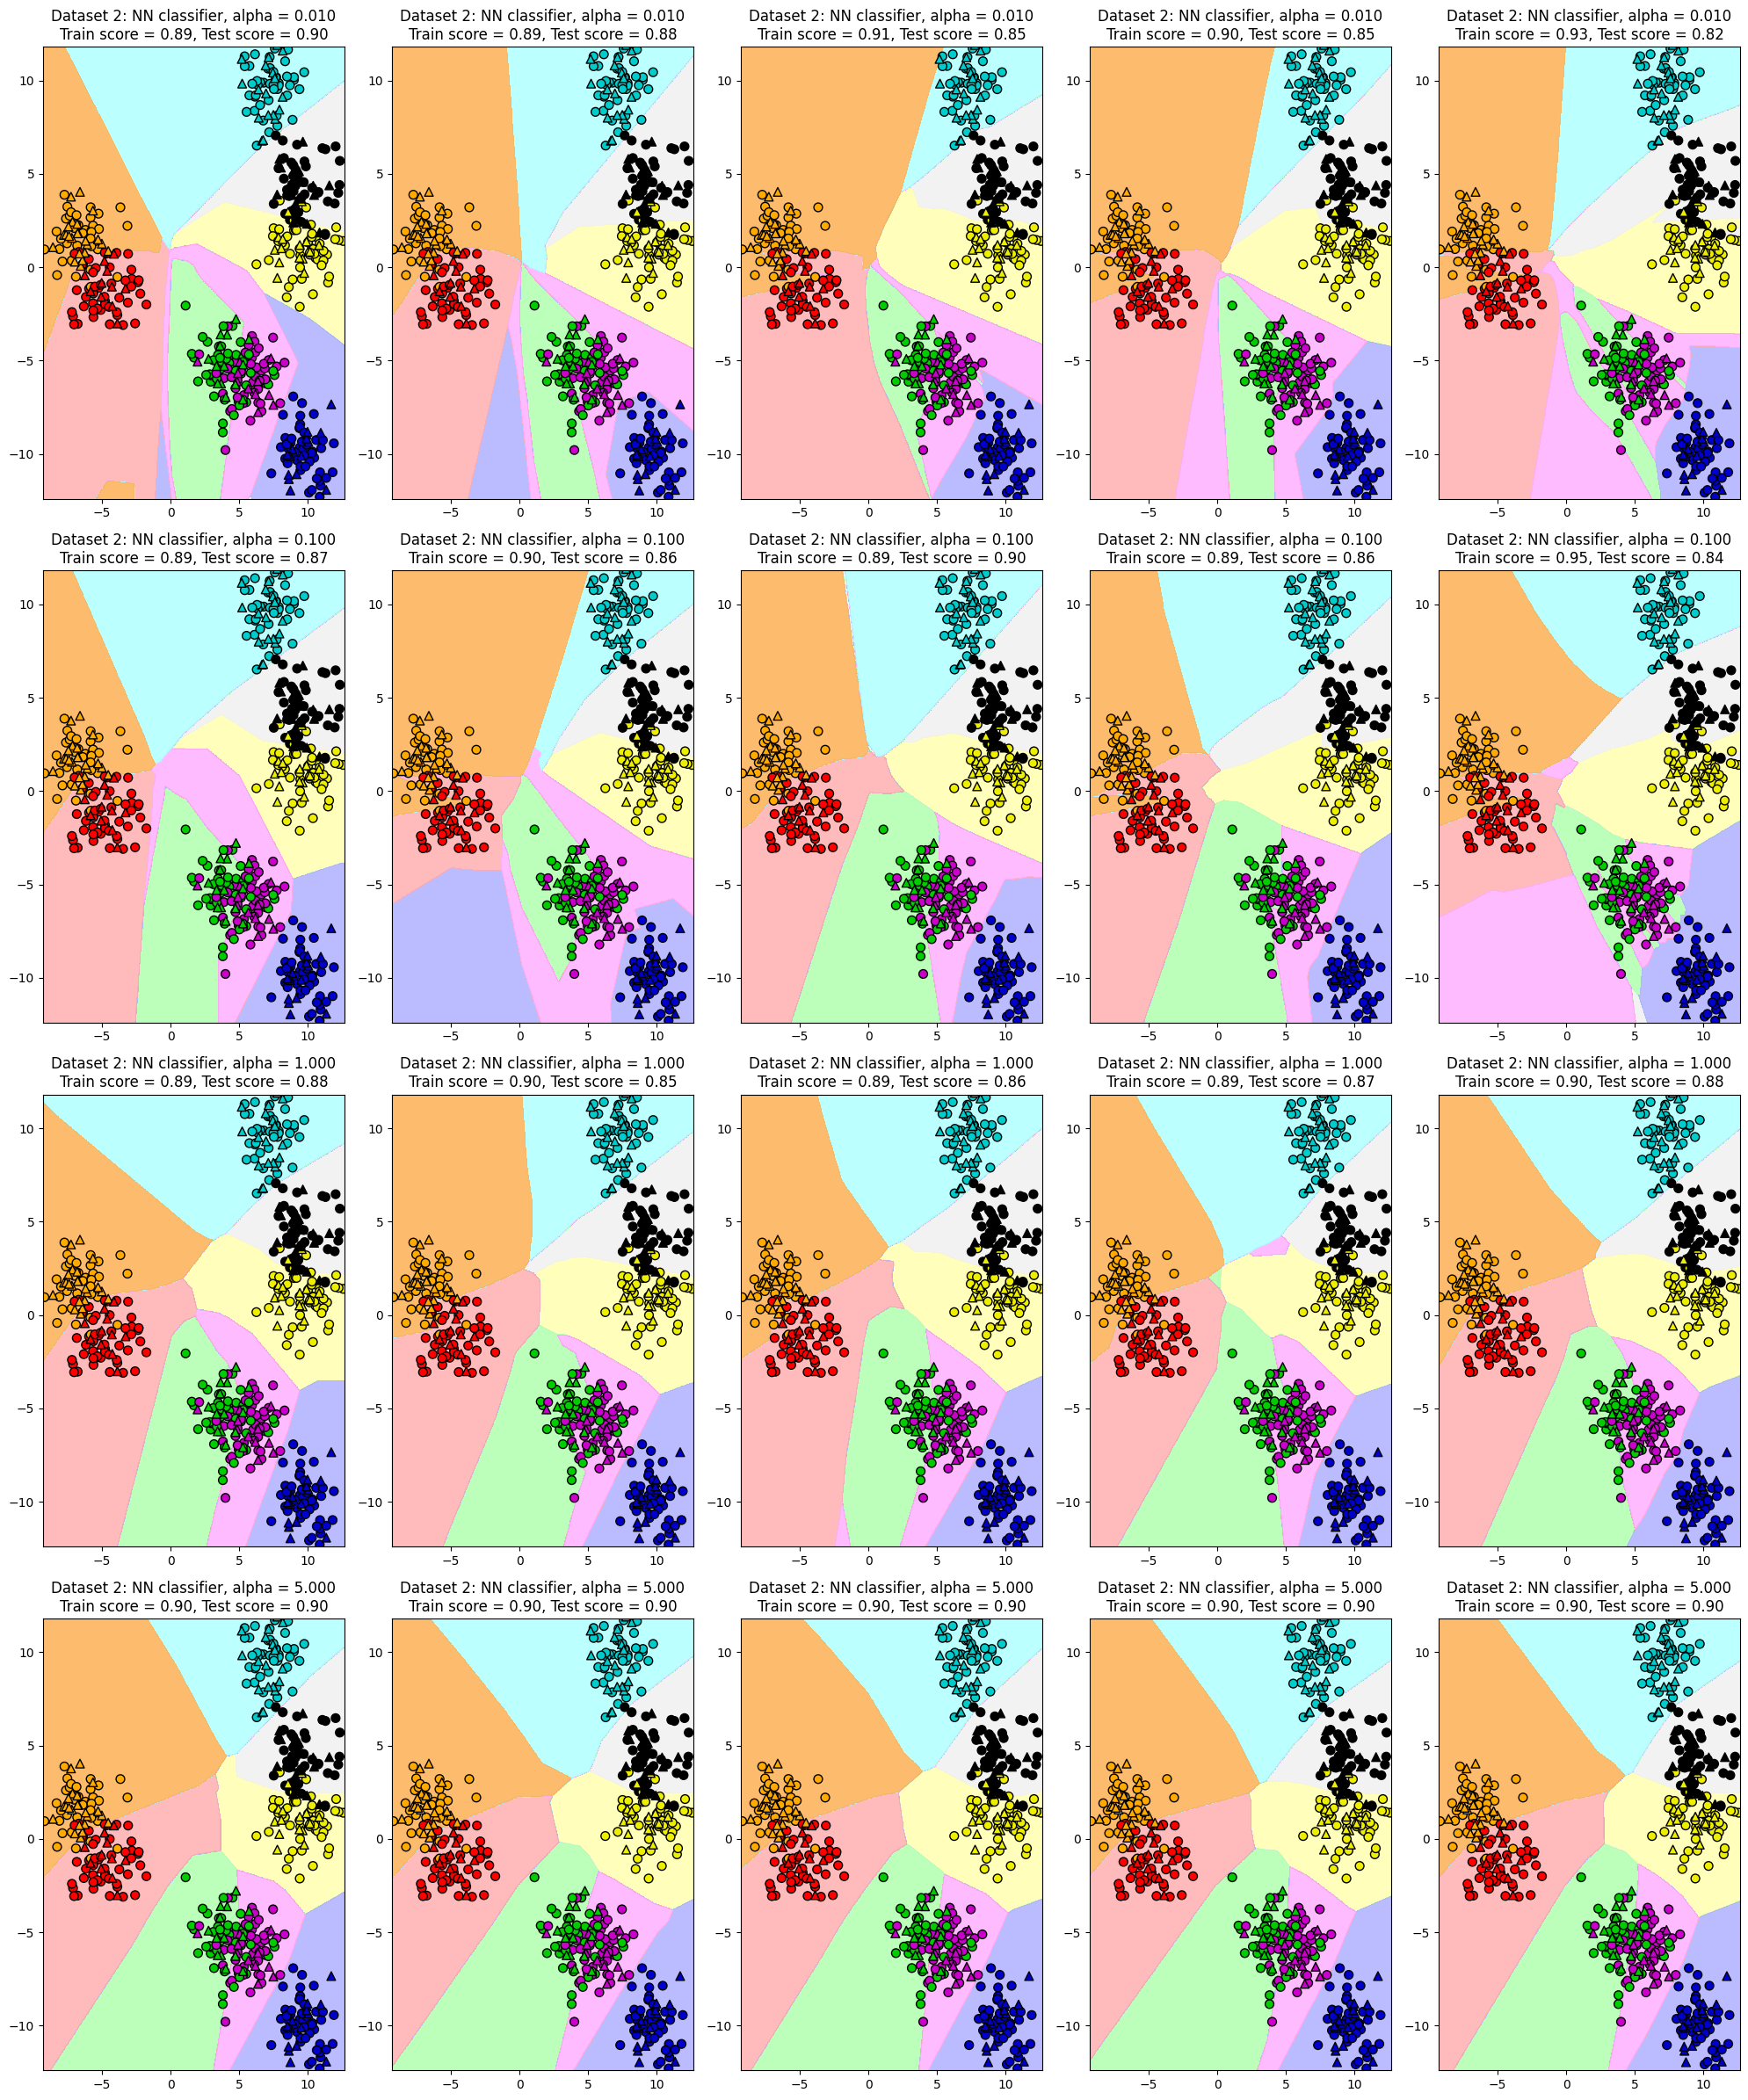

In [ ]:
X_D2, y_D2 = make_blobs(n_samples = 500, n_features = 2, centers = 8,
cluster_std = 1.3, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)
fig, subaxes = plt.subplots(4, 5, figsize=(20, 24))
for i, this_alpha in enumerate([0.01, 0.1, 1.0, 5.0]):
  for j, hidden_sizes in enumerate([(8,8), (16,8), (32, 16), (16, 16), (64,32)]):
    clf = MLPClassifier(max_iter=5000, solver="lbfgs", alpha = this_alpha,
                        hidden_layer_sizes = hidden_sizes,
                        random_state = 0).fit(X_train, y_train)
    title = "Dataset 2: NN classifier, alpha = {:.3f}".format(this_alpha)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
    X_test, y_test, title,
    subaxes[i,j])
    plt.tight_layout()
# получилось улучшить точность до 90 процентов

#  Задача 4
Загрузите набор данных breast_cancer, содержащий медицинские данные,
касающиеся опухоли груди и соответствующие диагнозы (опухоль злокачественная
или доброкачественная). Разработайте классификатор на базе многослойной
нейронной сети, обеспечивающий показатели качества классификации не ниже 96%.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
model = MLPClassifier(hidden_layer_sizes=(48, 8),
                      activation='relu',
                      max_iter=1000,
                      solver='lbfgs',
                      random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

[[51  2]
 [ 3 87]]
